# Importing libraries that are desired

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# reading the dataset into pandas dataframe

In [2]:
data = pd.read_csv('data/train.csv')

In [3]:
data.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,0,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,0,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,0,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,0,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,0,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


# Preprocessing

### Overall view of data

In [4]:
data.describe(include = 'all')

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
count,215.000000,215.000000,215.000000,215,215.000000,215,215,215.000000,215,215,215.000000,215,215.000000,215,148.000000
unique,NaN,NaN,NaN,2,NaN,2,3,NaN,3,2,NaN,2,NaN,2,NaN
top,NaN,NaN,NaN,Central,NaN,Others,Commerce,NaN,Comm&Mgmt,No,NaN,Mkt&Fin,NaN,Placed,NaN
freq,NaN,NaN,NaN,116,NaN,131,113,NaN,145,141,NaN,120,NaN,148,NaN
mean,108.000000,0.353488,67.303395,NaN,66.333163,NaN,NaN,66.370186,NaN,NaN,72.100558,NaN,62.278186,NaN,288655.405405
std,62.209324,0.479168,10.827205,NaN,10.897509,NaN,NaN,7.358743,NaN,NaN,13.275956,NaN,5.833385,NaN,93457.452420
min,1.000000,0.000000,40.890000,NaN,37.000000,NaN,NaN,50.000000,NaN,NaN,50.000000,NaN,51.210000,NaN,200000.000000
25%,54.500000,0.000000,60.600000,NaN,60.900000,NaN,NaN,61.000000,NaN,NaN,60.000000,NaN,57.945000,NaN,240000.000000
50%,108.000000,0.000000,67.000000,NaN,65.000000,NaN,NaN,66.000000,NaN,NaN,71.000000,NaN,62.000000,NaN,265000.000000
75%,161.500000,1.000000,75.700000,NaN,73.000000,NaN,NaN,72.000000,NaN,NaN,83.500000,NaN,66.255000,NaN,300000.000000


### View of null values in data

In [5]:
# the salary column has null values for those records where the student was not placed
data.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

### We shall classify the data to know if a student was placed or not

In [6]:
cols = [col for col in data.columns if col not in ['sl_no', 'salary']]
data_cls = data[cols]
data_cls.head()


,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,0,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,0,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,0,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,0,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,0,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed


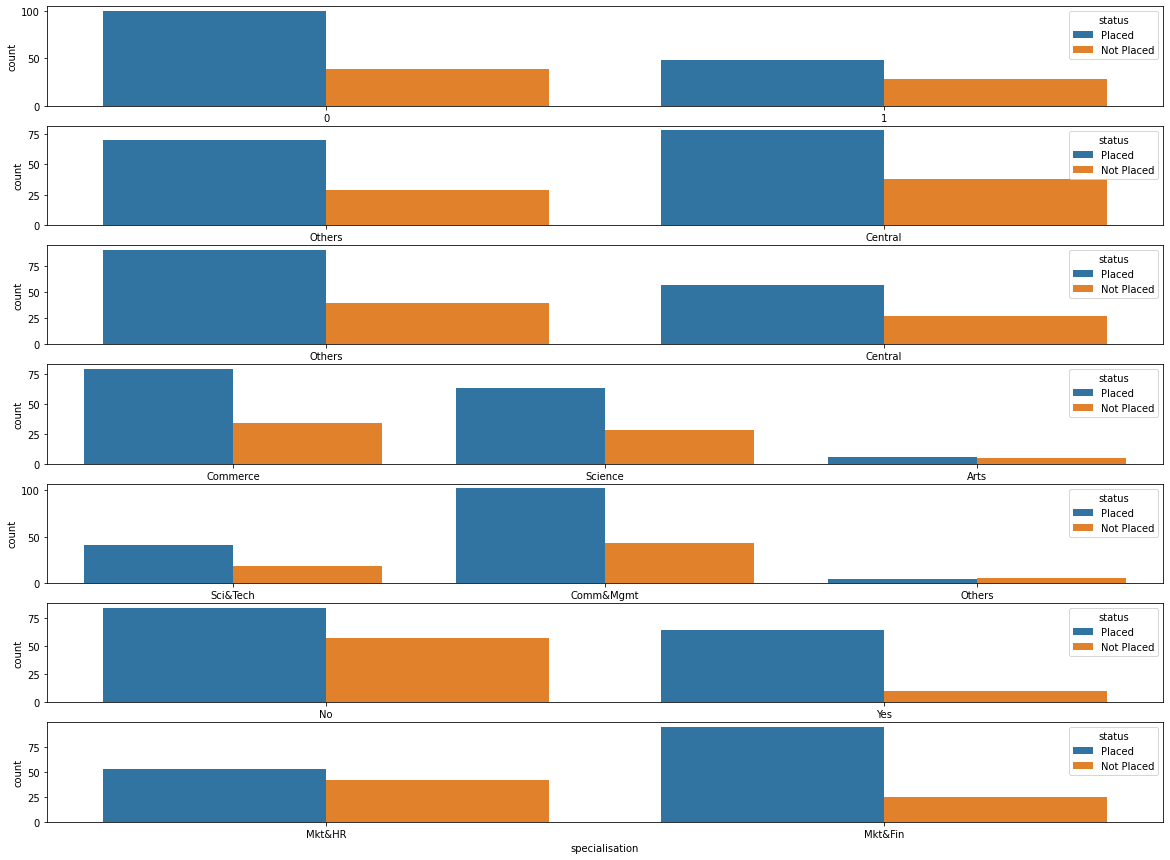

In [27]:
# univariate categorical data analysis
fig = plt.figure(figsize=(20, 15))
i = 1
for col in ['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex', 'specialisation']:
    plt.subplot(7, 1, i)
    sns.countplot(x=col, data=data_cls, hue='status')
    i+=1
plt.show()

In [33]:
# Import libraries and download example data
from sklearn.preprocessing import StandardScaler, OneHotEncoder


# Define which columns should be encoded vs scaled
columns_to_encode = ['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex', 'specialisation']
columns_to_scale  = [col for col in data_cls.columns if not col in columns_to_encode and col!='status']

# Instantiate encoder/scaler
scaler = StandardScaler()
ohe    = OneHotEncoder(sparse=False, drop='first')

# Scale and Encode Separate Columns
scaled_columns  = scaler.fit_transform(data_cls[columns_to_scale]) 
encoded_columns =    ohe.fit_transform(data_cls[columns_to_encode])

# Concatenate (Column-Bind) Processed Columns Back Together
processed_data = np.concatenate([scaled_columns, encoded_columns], axis=1)

In [34]:
processed_data[0]

array([-0.02808697,  2.2688123 , -1.14010225, -1.29109087, -0.59764672,
        0.        ,  1.        ,  1.        ,  1.        ,  0.        ,
        0.        ,  1.        ,  0.        ,  1.        ])

In [40]:
y = data_cls['status']
y = [1 if x == 'Placed' else 0 for x in y]

In [41]:
len(processed_data), len(y)

(215, 215)

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(processed_data, y,
                                                    stratify=y, 
                                                    test_size=0.25)

In [57]:
from sklearn.ensemble import GradientBoostingClassifier
import lightgbm as lgb

In [55]:
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.15,
    max_depth=4, random_state=0).fit(X_train, y_train)
clf.score(X_test, y_test)

0.8148148148148148

In [56]:
clf.score(X_train, y_train)

1.0

In [65]:
lgbm_cls = lgb.LGBMClassifier(learning_rate=0.09,max_depth=1,random_state=42)
lgbm_cls.fit(X_train,y_train,eval_set=[(X_test,y_test),(X_train,y_train)],
          eval_metric='logloss')

[LightGBM] [Info] Number of positive: 111, number of negative: 50
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000101 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 218
[LightGBM] [Info] Number of data points in the train set: 161, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.689441 -> initscore=0.797507
[LightGBM] [Info] Start training from score 0.797507


LGBMClassifier(learning_rate=0.09, max_depth=1, random_state=42)

In [66]:
lgbm_cls.score(X_test, y_test)

0.8333333333333334

In [67]:
lgbm_cls.score(X_train, y_train)

0.9006211180124224

In [75]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 80, max_depth=None)  
 
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)
 
# performing predictions on the test dataset
y_pred = clf.predict(X_test)

In [76]:
clf.score(X_test, y_test)

0.8333333333333334

In [77]:
clf.score(X_train, y_train)

1.0

In [90]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 200, num = 3)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [1, 2]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 3]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 3]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [91]:
from sklearn.model_selection import RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator = clf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

In [92]:
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(n_estimators=80),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [1, 2, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 3],
                                        'min_samples_split': [2, 3],
                                        'n_estimators': [50, 125, 200]},
                   random_state=42, verbose=2)

In [93]:
best_random = rf_random.best_estimator_

In [94]:
best_random.score(X_train, y_train)

1.0

In [95]:
best_random.score(X_test, y_test)

0.8333333333333334